#Market Basket

###Importación de librerias

In [122]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###Asignacion de la ubicacion de los datos

In [123]:
dire = "/content/Order_products.csv"
dire2="/content/Order_products.csv"

###Carga de datos 

In [124]:
dataset=pd.read_csv(dire,encoding='utf-8',engine='python',quoting=3)
data=pd.read_csv(dire2,encoding='utf-8',engine='python',quoting=3)

In [86]:
data

,order_id,product_name,add_to_cart_order
0,6695,Chocolate Sandwich Cookies,7
1,48361,Chocolate Sandwich Cookies,9
2,63770,Chocolate Sandwich Cookies,4
3,75339,Chocolate Sandwich Cookies,9
4,240996,Chocolate Sandwich Cookies,3
...,...,...,...
1384611,1092104,Smartblend Healthy Metabolism Dry Cat Food,1
1384612,655800,Fresh Foaming Cleanser,10
1384613,2198380,Fresh Foaming Cleanser,10
1384614,2508423,Fresh Foaming Cleanser,3


###Reacomodamos los datos para poder utilizarlos en el algoritmo 

In [87]:
dataset=dataset.pivot(index="order_id",columns="add_to_cart_order",values="product_name")

In [96]:
dataset

add_to_cart_order,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulgarian Yogurt,Organic 4% Milk Fat Whole Milk Cottage Cheese,Organic Celery Hearts,Cucumber Kirby,Lightly Smoked Sardines in Olive Oil,Bag of Organic Bananas,Organic Hass Avocado,Organic Whole String Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Grated Pecorino Romano Cheese,Spring Water,Organic Half & Half,Super Greens Salad,Cage Free Extra Large Grade AA Eggs,"""Prosciutto",Organic Garnet Sweet Potato (Yam),Asparagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Shelled Pistachios,Organic Biologique Limes,Organic Raw Unfiltered Apple Cider Vinegar,Organic Baby Arugula,Organic Hot House Tomato,Green Peas,Bunched Cilantro,"""Flat Parsley",Fresh Dill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Roasted Turkey,Organic Cucumber,Organic Grape Tomatoes,Organic Pomegranate Kernels,Organic Raspberries,Organic Whole Strawberries,Organic Blueberries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Natural Spring Water,Organic Orange Juice With Calcium & Vitamin D,Whole Milk Greek Blended Vanilla Bean Yogurt,Bag of Organic Bananas,Organic Chocolate Almondmilk Pudding,Organic Sliced Provalone Cheese,"""Tomatoes",Organic Unsweetened Almond Milk,"""Crackers",Uncured Applewood Smoked Bacon,Organic Seasoned Yukon Select Potatoes Hashed ...,Organic Extra Virgin Oil Olive,Organic Raspberries,Unsalted Cultured Butter,Guacamole,Black Beans,Raspberry Sorbet Pops,Geranium Liquid Dish Soap,Baby Swiss Slices Cheese,Organic Whole Grassmilk Milk,Organic Raw Kombucha Gingerade,Organic Hothouse Cucumbers,Black Beans No Salt Added,Organic Cinnamon Apple Sauce,Uncured Genoa Salami,Queso Fresco,Natural Chicken & Maple Breakfast Sausage Patty,Sliced Pepperoni,Organic Garlic,100% Organic Unbleached All-Purpose Flour,Lavender Scent Laundry Detergent,Organic Italian Parsley Bunch,Organic 2% Buttermilk,Organic Yellow Onion,Organic Free Range Chicken Broth,Organic Stringles Mozzarella String Cheese,Garbanzo Beans,Organic Ketchup,Organic Zucchini,Mild Diced Green Chiles,Pinto Beans No Salt Added,Organic Lemonade,Corn Maize Tortillas,Organic Corn Starch,Olive Oil & Aloe Vera Hand Soap,Plastic Spoons,Aluminum Foil,Plastic Wrap,Organic Coconut Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421049,Gluten Free Rice Bread,Organic Whole Grain Wheat English Muffins,Lemon

###Observamos con que frecuencia absoluta aparecen en las transacciones los productos productos 

In [89]:
productos=data['product_name'].value_counts()
boxplot=data['product_name'].value_counts()
productos=pd.DataFrame(productos)
productos

,product_name
Banana,18726
Bag of Organic Bananas,15480
Organic Strawberries,10894
Organic Baby Spinach,9784
Large Lemon,8135
...,...
Spf 30 Baby Sunscreen Cream,1
Salmon Jerky Dog Treats,1
Porcini Mushrooms,1
Mix Lemon Bar,1


###Estadistica descriptiva de los productos

In [115]:
print((productos/1384616).describe())


       product_name
count  3.839100e+04
mean   2.604777e-05
std    1.623498e-04
min    7.222219e-07
25%    1.444444e-06
50%    3.611110e-06
75%    1.299999e-05
max    1.352433e-02


###Grafica de frecuencia relativa de los primeros 50 productos 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


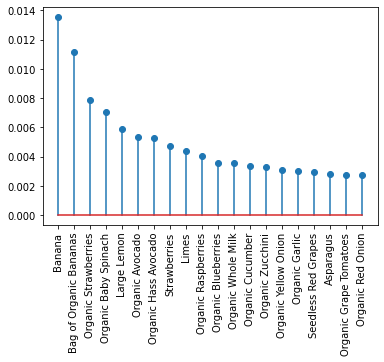

In [121]:

plt.stem(productos.index[0:20],((np.array(productos)/1384616)[0:20]))
plt.xticks(rotation=90)
plt.show()


### Boxplot de la frecuencia relativa 

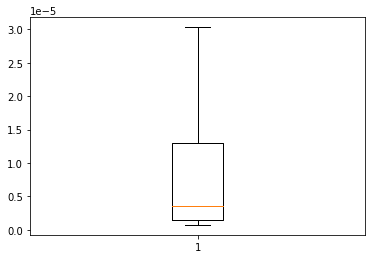

In [126]:
#para definir el soporte se hizo el siguiente analisis
plt.boxplot(boxplot/1384616,showfliers=False) 
plt.show()

### Algortimo reglas de asociación 

In [93]:

transactions =[]
for i in range(0,131209):
    transactions.append([str(dataset.values[i,j]) for j in range(1,80)])
from apyori import apriori
rules=apriori(transactions,min_support=0.0009,min_confidence=.1,min_lift =5 ,min_length=2)
results=list(rules)
from apyori import inspect 
frame = pd.DataFrame(inspect(results),columns=['recomendaciones','compra','soporte','confianza','lift'])


#Resultados

In [94]:
frame


,recomendaciones,compra,soporte,confianza,lift
0,"(Blackberries,)","(Raspberries,)",0.001730,0.232106,10.708312
1,"(Blackberries,)","(Strawberries,)",0.001722,0.231084,5.239378
2,"(Blueberries,)","(Raspberries,)",0.001867,0.112334,5.182561
3,"(Blueberry Yoghurt,)","(Strawberry Rhubarb Yoghurt,)",0.001067,0.293501,82.817159
4,"(Green Beans,)","(Broccoli Crown,)",0.000915,0.109290,5.143394
...,...,...,...,...,...
313,"(Organic Large Extra Fancy Fuji Apple, nan, Or...","(Organic Strawberries,)",0.001105,0.382586,5.022883
314,"(Organic Strawberries, nan, Organic Lemon)","(Organic Raspberries,)",0.001067,0.228758,6.016262
315,"(Organic Whole Milk, nan, Organic Raspberries)","(Organic Strawberries,)",0.000930,0.402640,5.286174
316,"(nan, Organic Yellow Onion, Organic Strawberries)","(Organic Raspberries,)",0.000907,0.193182,5.080616
